In [10]:
import pandas as pd
df = pd.read_csv("cph_pop_and_access_1k.csv")
df.head()

,id,lon,lat,population_density,avg_restaurant_dist,avg_bar_dist,avg_school_dist,avg_toilets_dist,avg_college_dist,avg_hospital_dist
0,55246,12.527917,55.695417,8509.044922,826.561404,920.052632,1000.000000,939.964912,1000.0,813.596491
1,55247,12.536250,55.695417,11358.980469,535.344828,590.942529,904.540230,600.655172,1000.0,963.563218
2,55248,12.544583,55.695417,12426.899414,181.544304,177.734177,496.367089,341.354430,1000.0,1000.000000
3,55249,12.552917,55.695417,12974.911133,157.525773,225.360825,759.319588,401.371134,1000.0,1000.000000
4,55250,12.561250,55.695417,9767.416016,222.821429,221.107143,991.223214,186.000000,1000.0,1000.000000


In [11]:
df["avg_user_selection"] = 0

In [12]:
user_selected_amenities = ["avg_restaurant_dist", "avg_bar_dist", "avg_toilets_dist"]

df["avg_user_selection"] = (df[user_selected_amenities[0]] + df[user_selected_amenities[1]] + df[user_selected_amenities[2]])/len(user_selected_amenities)

df

,id,lon,lat,population_density,avg_restaurant_dist,avg_bar_dist,avg_school_dist,avg_toilets_dist,avg_college_dist,avg_hospital_dist,avg_user_selection
0,55246,12.527917,55.695417,8509.044922,826.561404,920.052632,1000.000000,939.964912,1000.0,813.596491,895.526316
1,55247,12.536250,55.695417,11358.980469,535.344828,590.942529,904.540230,600.655172,1000.0,963.563218,575.647510
2,55248,12.544583,55.695417,12426.899414,181.544304,177.734177,496.367089,341.354430,1000.0,1000.000000,233.544304
3,55249,12.552917,55.695417,12974.911133,157.525773,225.360825,759.319588,401.371134,1000.0,1000.000000,261.419244
4,55250,12.561250,55.695417,9767.416016,222.821429,221.107143,991.223214,186.000000,1000.0,1000.000000,209.976190
...,...,...,...,...,...,...,...,...,...,...,...
127,59706,12.577917,55.603750,655.886902,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
128,59707,12.586250,55.603750,928.264771,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
129,59708,12.594583,55.603750,411.116058,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
130,59709,12.602917,55.603750,192.624252,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000


In [13]:
sample = df[["population_density", "avg_user_selection"]]
sample.head()

,population_density,avg_user_selection
0,8509.044922,895.526316
1,11358.980469,575.647510
2,12426.899414,233.544304
3,12974.911133,261.419244
4,9767.416016,209.976190


In [14]:
sample = sample.fillna(1000)

In [15]:
# Scale(normalize) the data attributes between 0-1

from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = sample.columns
d = scaler.fit_transform(sample)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,population_density,avg_user_selection
0,0.642317,0.882342
1,0.858345,0.522096
2,0.939294,0.136821
3,0.980834,0.168214
4,0.737703,0.110279


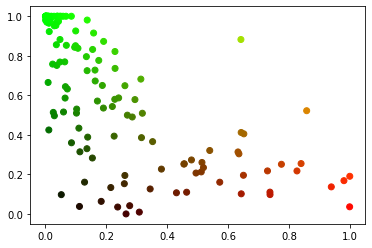

In [16]:
# Color mapping method to check if scaling worked correctly. 
# It would be great to implement this color scheme on the map! 

import numpy as np
import matplotlib.pyplot as plt 
# points = sample.to_numpy()
points = scaled_df.to_numpy()

R = (points[:,0] - points[:,0].min())/(points[:,0].max()-points[:,0].min())
G = (points[:,1] - points[:,1].min())/(points[:,1].max()-points[:,1].min())
B = np.zeros(R.shape)

clrs = np.column_stack((R,G,B))

plt.scatter(points[:,0],points[:,1],color=clrs)
plt.show()

In [17]:
# Adding scaled data rows in the original data frame 

df['scaled_pop'] = scaled_df['population_density']
df['scaled_acc'] = scaled_df['avg_user_selection']

In [18]:
# Manually dividing quadrant, put the result in a seperate row
# ...there should be better way to do this 

df.loc[(df['scaled_pop'] > 0.5) & (df['scaled_acc'] > 0.5), 'quadrant'] = '1' 
df.loc[(df['scaled_pop'] <= 0.5) & (df['scaled_acc'] > 0.5), 'quadrant'] = '2' 
df.loc[(df['scaled_pop'] <= 0.5) & (df['scaled_acc'] <= 0.5), 'quadrant'] = '3' 
df.loc[(df['scaled_pop'] > 0.5) & (df['scaled_acc'] <= 0.5), 'quadrant'] = '4' 

df.head()

,id,lon,lat,population_density,avg_restaurant_dist,avg_bar_dist,avg_school_dist,avg_toilets_dist,avg_college_dist,avg_hospital_dist,avg_user_selection,scaled_pop,scaled_acc,quadrant
0,55246,12.527917,55.695417,8509.044922,826.561404,920.052632,1000.000000,939.964912,1000.0,813.596491,895.526316,0.642317,0.882342,1
1,55247,12.536250,55.695417,11358.980469,535.344828,590.942529,904.540230,600.655172,1000.0,963.563218,575.647510,0.858345,0.522096,1
2,55248,12.544583,55.695417,12426.899414,181.544304,177.734177,496.367089,341.354430,1000.0,1000.000000,233.544304,0.939294,0.136821,4
3,55249,12.552917,55.695417,12974.911133,157.525773,225.360825,759.319588,401.371134,1000.0,1000.000000,261.419244,0.980834,0.168214,4
4,55250,12.561250,55.695417,9767.416016,222.821429,221.107143,991.223214,186.000000,1000.0,1000.000000,209.976190,0.737703,0.110279,4


In [21]:
# Simply replaced color from 'avg_user_selection' to 'quadrant' 
# from what Jacob made earlier 

import plotly.express as px
 
px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(
        df, 
        lon="lon", lat="lat", 
        hover_data=["population_density"] + user_selected_amenities,
        size="population_density",
        color="quadrant",
        color_continuous_scale="Viridis_r", #viridis reversed
        mapbox_style="outdoors",
    )

fig.show()